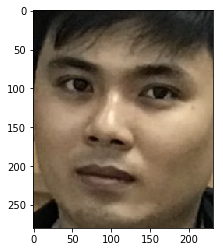

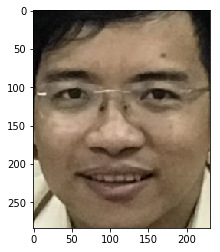

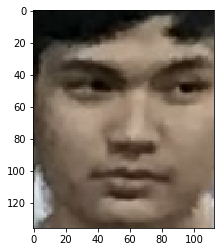

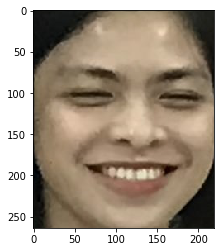

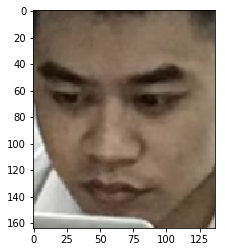

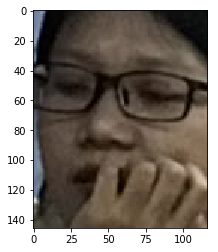

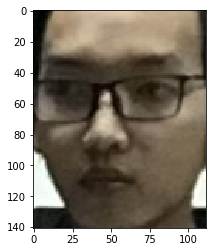

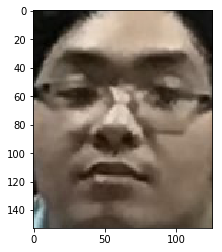

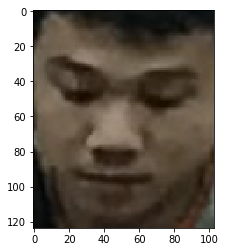

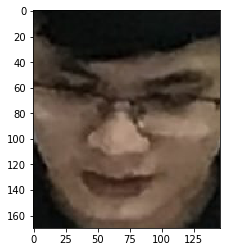

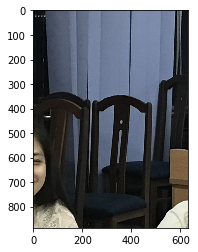

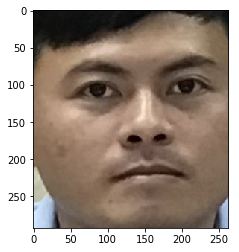

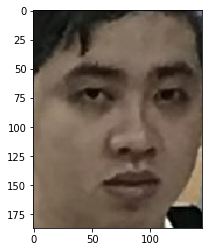

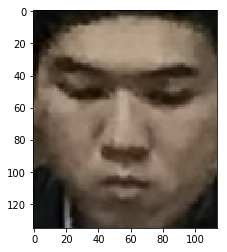

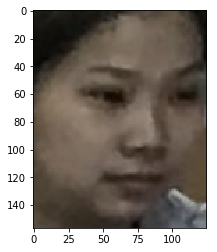

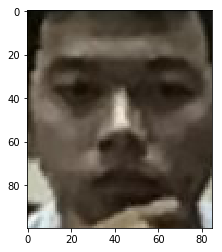

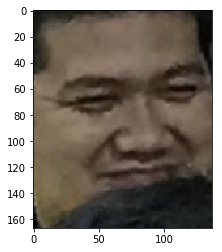

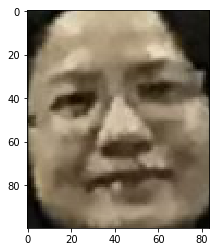

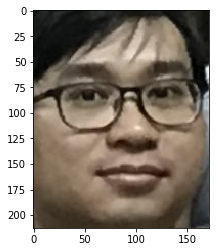

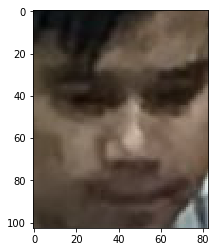

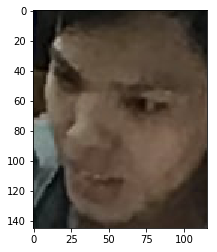

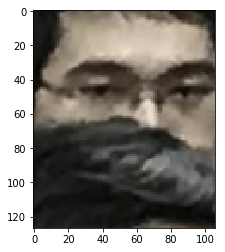

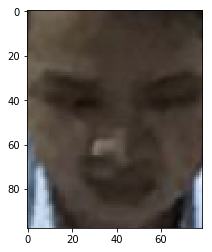

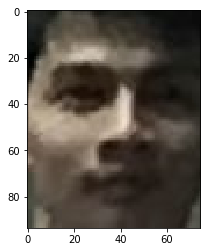

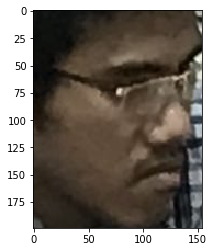

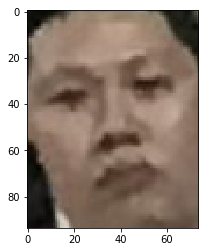

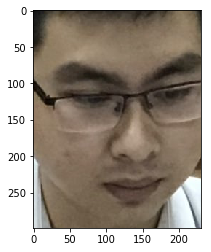

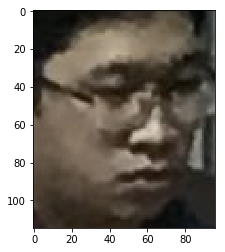

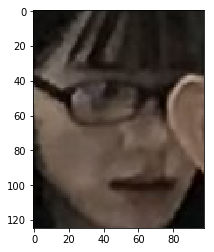

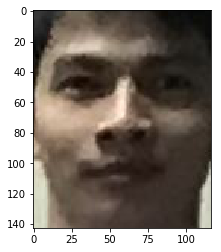

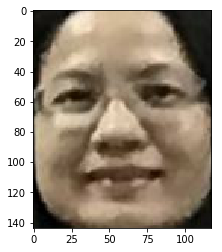

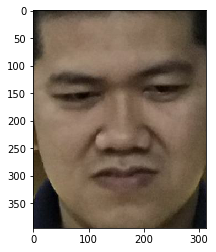

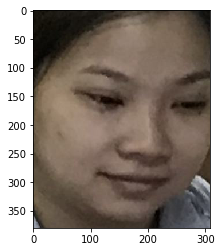

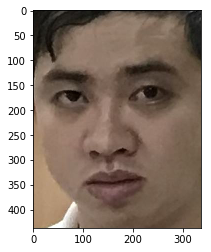

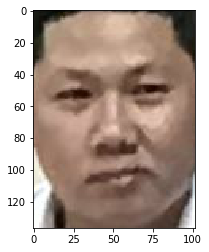

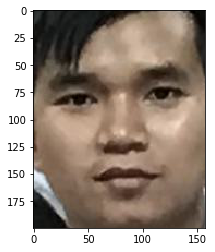

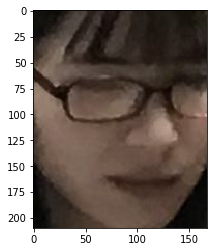

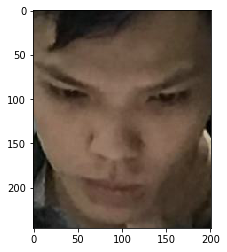

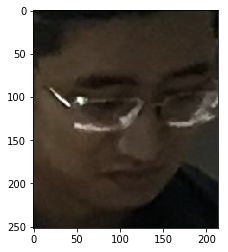

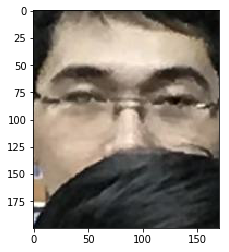

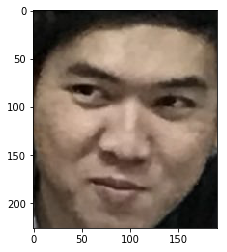

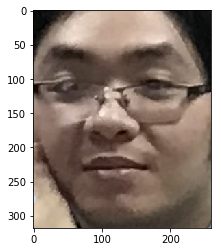

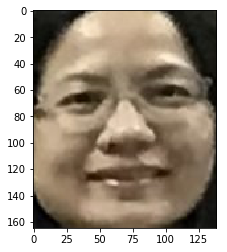

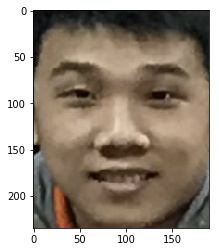

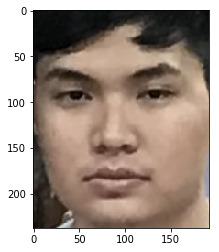

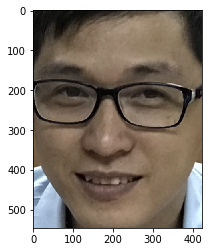

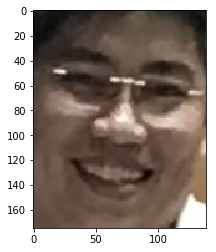

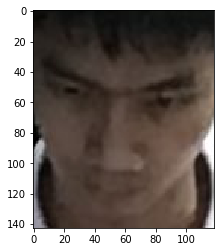

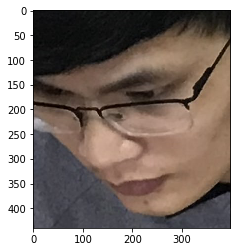

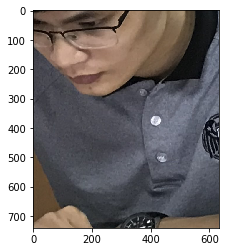

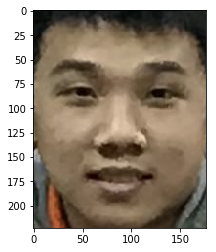

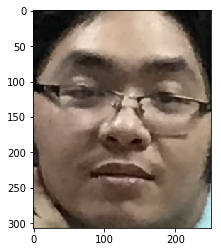

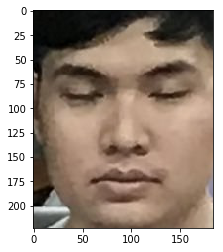

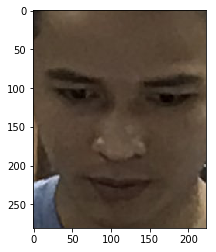

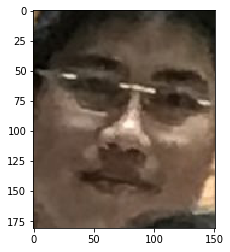

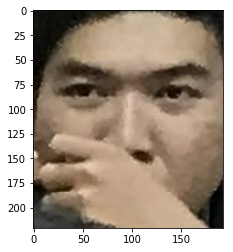

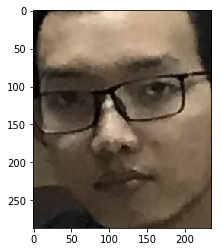

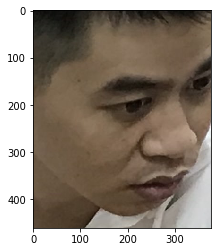

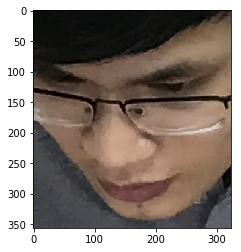

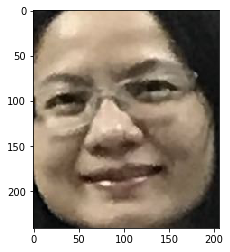

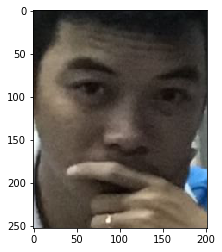

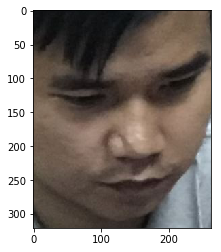

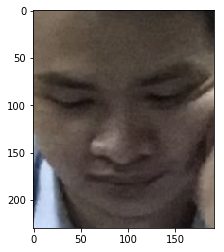

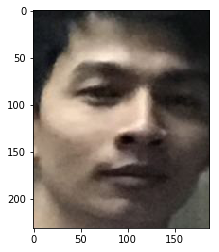

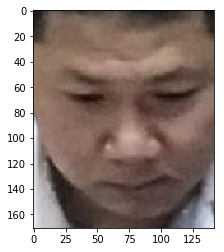

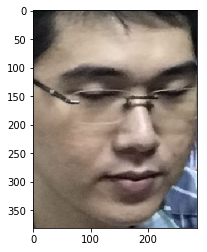

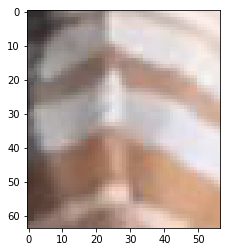

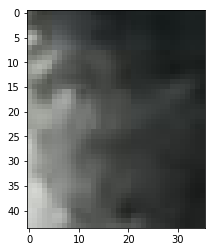

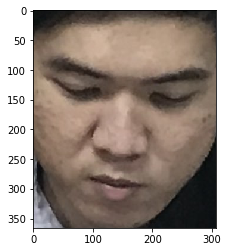

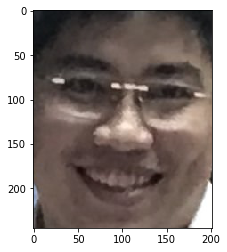

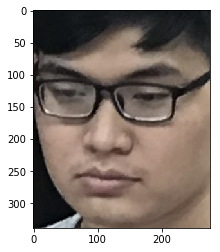

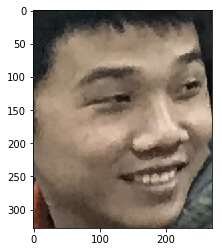

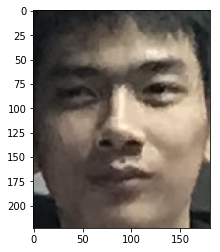

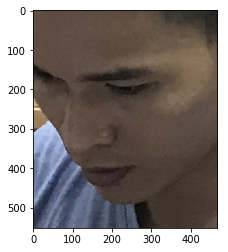

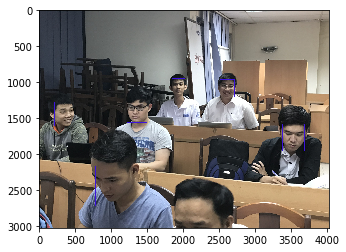

In [44]:
from mtcnn.mtcnn import MTCNN

import os
import matplotlib.pyplot as plt
import cv2

detector = MTCNN()


path_facedb = 'image_facedb'
path_facedb_crop = 'image_facedb_crop'
dir_facedb = os.listdir(path_facedb)

count_folder = 1

for item in dir_facedb:
    images = os.path.join(path_facedb,item)
    
    img = cv2.imread(images)
    img_temp = img.copy()
    img_crop = []
    
    path_sub_facedb_crop = path_facedb_crop + '/face-' + str(count_folder)
    if not os.path.exists(path_sub_facedb_crop):
        os.mkdir(path_sub_facedb_crop)
    
    result = detector.detect_faces(img)

    count = 1
    for faces in result:
        bounding_box = faces['box']

        cv2.rectangle(
            img_temp,
            (bounding_box[0],bounding_box[1]),
            (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
            (220,20,60),
            3
        )
        
        img_crop = img[bounding_box[1]:bounding_box[1] + bounding_box[3],bounding_box[0]:bounding_box[0] + bounding_box[2]]
        plt.imshow(cv2.cvtColor(img_crop,cv2.COLOR_BGR2RGB))
        plt.show()

        cv2.imwrite(os.path.join(path_sub_facedb_crop, str(count) + ".jpg"),img_crop)
        count = count + 1

    count_folder = count_folder + 1
    plt.imshow(cv2.cvtColor(img_temp,cv2.COLOR_BGR2RGB))


